<a href="https://colab.research.google.com/github/NAGADEEP92/AI-ML-DS/blob/main/Statistics_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating (Sample) Mean and Standard Deviation
$$ \mu = \frac {\sum x_i} {n}\;\;\;\; \sigma = \sqrt {\frac {\sum (x_i - \mu)^2} {n} } $$
--

In [ ]:
def mean(X):
    mu = sum(X) / len(X)

    return mu

In [ ]:
def standard_deviation(X, mu=None):
    if not mu:
        mu = mean(X)
    sigma = (sum([(x - mu)**2 for x in X])/len(X))**0.5

    return sigma

# Normal Probability Distribution Function
$ p = \frac {1}{\sigma \sqrt {2 \pi}} e^{- \frac{1}{2} \left( \frac {x - \mu}{ \sigma }\right)^2}$
--

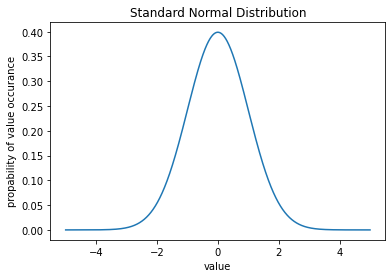

In [ ]:
import matplotlib.pyplot as plt


def PDF(x, mean=0, std_dev=1):
    # define e and pi explicitly
    e = 2.718281828
    pi = 3.1415927
    # calculate in two steps
    p = 1.0 / (std_dev * ((2 * pi) ** 0.5))
    p *= e ** (-0.5 * ((x - mean)/std_dev)**2)

    return p


X = [(x - 1000)/200 for x in list(range(2001))]
P = [PDF(x) for x in X]
plt.plot(X, P)
plt.title(label="Standard Normal Distribution")
plt.xlabel(xlabel="value")
plt.ylabel(ylabel="propability of value occurance")
plt.show()

# Basic Centerpoint Integration

We start t at $\frac {w}{2}$ to use centerpoints for
each panel.

There are other methods of numerical integration.

Centerpoint is pretty good at balancing areas above

and below the function being integrated.

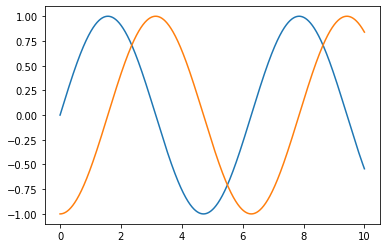

In [ ]:
import matplotlib.pyplot as plt
import math

w = 1/1000
f_of_t = math.sin

T = [w/2]
S = [0]
C = [-1]
for t in range(10000):
    T.append(T[-1] + w)  # Our time step
    S.append(f_of_t(t*w))  # Our Function
    C.append(f_of_t(t*w)*w + C[-1])  # Integrating

plt.plot(T, S)
plt.plot(T, C)
plt.show()

# Cummulative Normal Distribution Function
$$ cdf = \int_{x_{left}}^{x_{right}} {\frac {1}{\sigma \sqrt {2 \pi}} e^{- \frac{1}{2} \left( \frac {x - \mu}{ \sigma }\right)^2}}$$

Total integral of PDF = 1.0


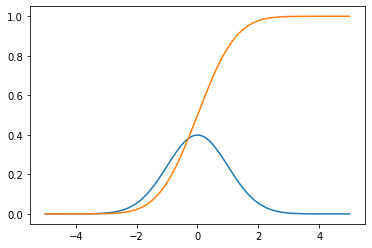

In [ ]:
import matplotlib.pyplot as plt


def PDF(x, mean=0, std_dev=1):
    # define e and pi explicitly
    e = 2.718281828
    pi = 3.1415927
    # calculate in two steps
    p = 1.0 / (std_dev * ((2 * pi) ** 0.5))
    p *= e ** (-0.5 * ((x - mean)/std_dev)**2)

    return p


def CDF(mean=0, std_dev=1, x_left=-5, x_right=5, width=0.0001):
    CDF = 0
    X = []  # for plotting only
    CDF_y = []  # for plotting only

    x = x_left + width / 2
    while x < x_right:
        X.append(x)  # for plotting only
        panel = PDF(x, mean, std_dev) * width  # panel under PDF
        CDF += panel  # running sum of panels = integration
        CDF_y.append(CDF)  # for plotting only
        x += width  # current x value

    return CDF, X, CDF_y


total_integral, X, CDF_y = CDF()
P = [PDF(x) for x in X]
total_integral = round(total_integral, 5)
msg = f'Total integral of PDF = {total_integral}'
print(msg)
plt.plot(X, P)
plt.plot(X, CDF_y)
plt.show()

# The Beta Distribution
$$ f(x, \alpha, \beta) = \frac {1} {B(\alpha, \beta)} \; x^{\alpha - 1} \; (1 - x)^{\beta - 1} $$

$$ B(\alpha, \beta) = \int_0^1 t^{\alpha - 1} (1 - t)^{\beta - 1} dt $$

The total integral of beta_PDF is 1.0


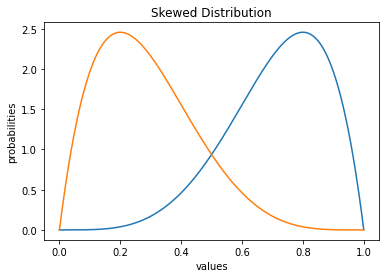

In [ ]:
import matplotlib.pyplot as plt

class Beta_Distribution:
    def __init__(self, alpha, beta, panels=10000):
        self.alpha = alpha
        self.beta = beta
        self.panels = panels
        self.__Beta_Function__()

    def __Beta_Function__(self):
        width = 1 / self.panels
        X = [x/self.panels for x in range(self.panels)]
        # makes total integral of beta_PDF sum to 1
        self.B = sum(
            [(x**(self.alpha - 1) * \
             (1 - x)**(self.beta - 1)) * width
             for x in X])

    def beta_PDF(self, x):
        return x**(self.alpha - 1) * \
               (1 - x)**(self.beta - 1) / self.B


X = [x/1000 for x in range(1000+1)]
bd = Beta_Distribution(5, 2)
Y1 = [bd.beta_PDF(x) for x in X]
Y_integral = round(sum([y*0.001 for y in Y1]), 3)
bd = Beta_Distribution(2, 5)
Y2 = [bd.beta_PDF(x) for x in X]

print(f"The total integral of beta_PDF is {Y_integral}")
plt.plot(X, Y1)
plt.plot(X, Y2)
plt.title(label="Skewed Distribution")
plt.xlabel(xlabel="values")
plt.ylabel(ylabel="probabilities")
plt.show()

# Student's T-Distribution
$$ B(\alpha, \beta) = \int_0^1 t^{\alpha - 1} (1 -t) ^ {\beta - 1} $$

$$ PDF_t(t) = \frac {1} {\sqrt {\nu} B( \frac {1}{2}, \frac {\nu}{2})} \left( 1 + \frac {t^2}{\nu} \right) ^ {- \frac {\nu + 1}{2}} $$

In [ ]:
class T_Distribution:
    def __init__(self, dof=9):
        self.beta = self.beta_function(0.5, dof/2)

        self.front = 1 / (dof ** 0.5 * self.beta)
        self.dof = dof
        self.power = -(dof + 1)/2

    def beta_function(self, x, y):
      pw = 1 / 1000000
      beta = 0
      t = pw / 2
      while t < 1.0:
          beta += t ** (x - 1) * (1 - t) ** (y - 1) * pw
          t += pw

      return beta

    def PDFt(self, t):
        # The t probability distribution method
        f_of_t = self.front * (1 + t**2/self.dof) ** self.power

        return f_of_t

    def CDFt(self, t_left, t_right):
        # The t cummulative distribution method
        # We simply numerically integrate under the PDFt curve
        panels = self.dof * 100
        width = (t_right - t_left) / panels
        cdf = 0
        t = t_left
        prob = self.PDFt(t)
        # print(panels, width, prob)
        for i in range(panels):
            t += i * width
            prob = self.PDFt(t)
            cdf += prob * width

        return cdf

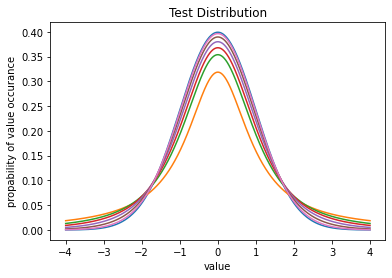

In [ ]:
import matplotlib.pyplot as plt


def PDF(x, mean=0, std_dev=1):
    # define e and pi explicitly
    e = 2.718281828
    pi = 3.1415927
    # calculate in two steps
    p = 1.0 / (std_dev * ((2 * pi) ** 0.5))
    p *= e ** (-0.5 * ((x - mean)/std_dev)**2)

    return p


X = [(x - 1000)/250 for x in list(range(2001))]
P = [PDF(x) for x in X]
plt.plot(X, P)
for dof in [1, 2, 3, 5, 10, 30]:
    t_dist = T_Distribution(dof=dof)
    TP = [t_dist.PDFt(x) for x in X]
    plt.plot(X, TP)

plt.title(label="Test Distribution")
plt.xlabel(xlabel="value")
plt.ylabel(ylabel="propability of value occurance")
plt.show()

## Basic Determination Of Significance Value
A Khan Academy Problem

In [ ]:
X = [80]*5 + [82.5]*24 + [85]*72 + [87.5]*181 + [90]*281 + \
    [92.5]*272 + [95]*136 + [97.5]*27 + [100]*2

mu = mean(X)
std = standard_deviation(X, mu=mu)
print(mu, std)

90.54 3.362796455332963


In [ ]:
the_85_and_less = [x for x in X if x <= 85]
percentage_LE_85 = len(the_85_and_less)/len(X)
print(percentage_LE_85)

0.101


# Null And Alternate Hypotheses Distributions With Dynamic Significance Level

For the LaTeX in MatPlotLib Inside Colab, See:
https://stackoverflow.com/a/62075348/996205

In [ ]:
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

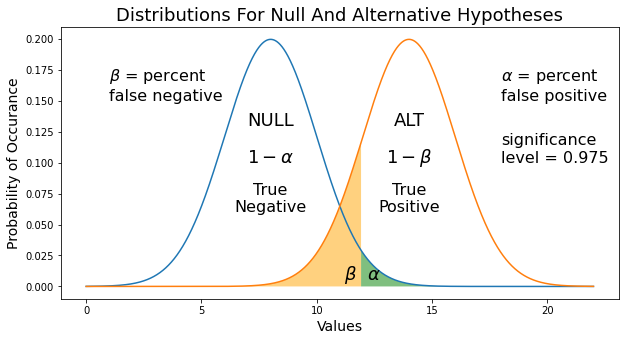

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import math
import time

def PDF(x, mean=0, std_dev=1):
    p = 1.0 / (std_dev * ((2 * math.pi) ** 0.5))
    p *= math.e ** (-0.5 * ((x - mean)/std_dev)**2)
    return p

pw = 1/1000
X = [(x + 0.5)*pw for x in range(22000)]
P1 = [PDF(x, 8, 2) for x in X]
P2 = [PDF(x, 14, 2) for x in X]

C1 = []  # C2 = []
sum1 = 0  # sum2 = 0
for i in range(len(X)):
    sum1 += P1[i]*pw  # sum2 += P2[i]*pw
    C1.append(sum1)  # C2.append(sum2)

SigLevels = [(v/2 + 90)/100 for v in range(17)]
SigLevels = [0.975]

for sl in SigLevels:
    for i in range(len(X)):
        if C1[i] > sl:
            sig_i = i
            break

    plt.figure(figsize = (10,5))
    plt.plot(X, P1)
    plt.plot(X, P2)

    plt.title(
        label="Distributions For Null And Alternative Hypotheses", fontsize=18)
    plt.xlabel(xlabel="Values", fontsize=14)
    plt.ylabel(ylabel="Probability of Occurance", fontsize=14)

    plt.fill_between(X[sig_i:], 0, P1[sig_i:], facecolor='green', alpha=0.5)
    plt.fill_between(X[:sig_i], 0, P2[:sig_i], facecolor='orange', alpha=0.5)

    plt.text(8, 0.13, 'NULL', fontsize=18, ha='center')
    plt.text(14, 0.13, 'ALT', fontsize=18, ha='center')

    plt.text(8, 0.06, 'True\nNegative', fontsize=16, ha='center')
    plt.text(14, 0.06, 'True\nPositive', fontsize=16, ha='center')

    plt.text(1, 0.15, r'$\beta$ = percent'+'\nfalse negative',
            fontsize=16, ha='left')
    plt.text(18, 0.15, r'$\alpha$ = percent'+'\nfalse positive',
            fontsize=16, ha='left')
    this_text = f'significance\nlevel = {round(sl, 3)}'
    plt.text(18, 0.10, this_text,
            fontsize=16, ha='left')

    plt.text(8, 0.1, r'$1 - \alpha$', fontsize=18, ha='center')
    plt.text(14, 0.1, r'$1 - \beta$', fontsize=18, ha='center')

    plt.text(X[sig_i] + 0.25, 0.005, r'$\alpha$', fontsize=18)
    plt.text(X[sig_i] - 0.75, 0.005, r'$\beta$', fontsize=18)

    plt.savefig(f'hypo_{round(sl, 3)}.png')
    plt.show()
    time.sleep(1)
    plt.figure().clear()

# Null And Alternate Hypotheses Distributions With Dynamic Alternative Mean

In [ ]:
import matplotlib.pyplot as plt
import math
import time

def PDF(x, mean_=0, std_dev_=1):
    p = 1.0 / (std_dev_ * ((2 * math.pi) ** 0.5))
    p *= math.e ** (-0.5 * ((x - mean_)/std_dev_)**2)
    return p

pw = 1/1000
X = [(x + 0.5)*pw for x in range(22000)]
P1 = [PDF(x, 8, 2) for x in X]

C1 = []  # C2 = []
sum1 = 0
for i in range(len(X)):
    sum1 += P1[i]*pw
    C1.append(sum1)

sig_level = 0.975
for i in range(len(X)):
    if C1[i] > sig_level:
        sig_i = i
        break

for i in range(19):
    mu_alt = 12.4 + i * 0.2
    mu_alt = round(mu_alt, 1)

    P2 = [PDF(x, mu_alt, 2) for x in X]
    plt.figure(figsize = (10,5))
    plt.plot(X, P1)
    plt.plot(X, P2)

    plt.title(
        label="Distributions For Null And Alternative Hypotheses", fontsize=18)
    plt.xlabel(xlabel="Values", fontsize=14)
    plt.ylabel(ylabel="Probability of Occurance", fontsize=14)

    plt.fill_between(X[sig_i:], 0, P1[sig_i:], facecolor='green', alpha=0.5)
    plt.fill_between(X[:sig_i], 0, P2[:sig_i], facecolor='orange', alpha=0.5)

    plt.text(8, 0.13, 'NULL', fontsize=16, ha='center')
    plt.text(mu_alt, 0.13, 'ALT', fontsize=16, ha='center')

    plt.text(8, 0.06, 'True\nNegative', fontsize=14, ha='center')
    plt.text(mu_alt, 0.06, 'True\nPositive', fontsize=14, ha='center')

    plt.text(1, 0.15, r'$\beta$ = percent'+'\nfalse negative',
             fontsize=14, ha='left')
    plt.text(20, 0.15, r'$\alpha$ = percent'+'\nfalse positive',
             fontsize=14, ha='left')
    this_text = f'significance\nlevel = {round(sig_level, 3)}'
    plt.text(20, 0.10, this_text,
             fontsize=14, ha='left')
    plt.text(20, 0.06, r'$\mu_{alt}$' + f' = {mu_alt}',
             fontsize=16, ha='left')

    plt.text(8, 0.1, r'$1 - \alpha$', fontsize=16, ha='center')
    plt.text(mu_alt, 0.1, r'$1 - \beta$', fontsize=16, ha='center')


    plt.text(X[sig_i] + 0.25, 0.005, r'$\alpha$', fontsize=18)
    plt.text(X[sig_i] - 0.75, 0.005, r'$\beta$', fontsize=18)

    plt.xlim([0, 26])
    plt.savefig(f'hypos_{round(mu_alt, 1)}.png')
    plt.show()
    time.sleep(1)
    plt.figure().clear()

# ROC Curve From Dynamic Significance Level

ROC = True Positive Rate vs. False Positive Rate

In [ ]:
import matplotlib.pyplot as plt
import math
import time

def PDF(x, mean=0, std_dev=1):
    p = 1.0 / (std_dev * ((2 * math.pi) ** 0.5))
    p *= math.e ** (-0.5 * ((x - mean)/std_dev)**2)
    return p

pw = 1/1000
X = [(x + 0.5)*pw for x in range(22000)]
P1 = [PDF(x, 8, 2) for x in X]
P2 = [PDF(x, 11, 2) for x in X]

C1 = []
C2 = []
sum1 = 0
sum2 = 0
for i in range(len(X)):
    sum1 += P1[i]*pw
    sum2 += P2[i]*pw
    C1.append(sum1)
    C2.append(sum2)

ROC_X = []
ROC_Y = []
pts = 41
Sig_Levels = [(v * 100/(pts-1))/100 for v in range(0, pts)]

for sig_lev in Sig_Levels:
    if sig_lev == 1:
        sig_lev = 0.999
    for i in range(len(X)):
        if C1[i] > sig_lev:
            sig_i = i
            break

    if sig_lev == 0.999:
        sig_lev = 1

    TP_Rate = 1 - C2[sig_i]
    FP_Rate = 1 - C1[sig_i]

    ROC_X.append(FP_Rate)
    ROC_Y.append(TP_Rate)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(X, P1)
    ax1.plot(X, P2)

    msg = "Receiver Operator Curve (ROC) From Sweeping Significance Level"
    fig.suptitle(msg, fontsize=18)

    msg = "Significance Level On Null & Alt Distributions"
    ax1.set_title(label=msg)
    ax1.set_xlabel(xlabel="Values", fontsize=14)
    ax1.set_ylabel(ylabel="Probability of Occurance", fontsize=14)

    ax1.fill_between(X[sig_i:], 0, P1[sig_i:], facecolor='green', alpha=0.5)
    ax1.fill_between(X[:sig_i], 0, P2[:sig_i], facecolor='orange', alpha=0.5)

    ax1.text(1, 0.15, r'$\beta$ = percent'+'\nfalse neg',
            fontsize=16, ha='left')
    ax1.text(14, 0.15, r'$\alpha$ = percent'+'\nfalse pos',
            fontsize=16, ha='left')
    this_text = f'significance\nlevel = {round(sig_lev, 3)}'
    ax1.text(14, 0.10, this_text,
            fontsize=16, ha='left')

    ax1.text(X[sig_i] + 0.25, 0.005, r'$\alpha$', fontsize=18)
    ax1.text(X[sig_i] - 0.75, 0.005, r'$\beta$', fontsize=18)

    ax1.set_xlim([0, 21])

    ax2.plot([0, 1], [0, 1])
    ax2.plot(ROC_X, ROC_Y)
    ax2.set_title(label="Receiver Operator Curve (ROC)")
    ax2.set_xlabel(xlabel="False Positive Rate", fontsize=14)
    ax2.set_ylabel(ylabel="True Positive Rate", fontsize=14)
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    plt.show()

    fig.savefig(f'hypo_{round(sig_lev, 3)}.png')
    time.sleep(0.2)

# ROC Curve Changes Due To Separation Of NULL And ALT Distributions' Means

ROC = True Positive Rate vs. False Positive Rate

In [ ]:
import matplotlib.pyplot as plt
import math
import time

def PDF(x, mean=0, std_dev=1):
    p = 1.0 / (std_dev * ((2 * math.pi) ** 0.5))
    p *= math.e ** (-0.5 * ((x - mean)/std_dev)**2)
    return p

pw = 1/1000
X = [(x + 0.5)*pw for x in range(22000)]
P1 = [PDF(x, 8, 2) for x in X]

C1 = []
sum1 = 0
for i in range(len(X)):
    sum1 += P1[i]*pw
    C1.append(sum1)

pts = 101
Sig_Levels = [(v * 100/(pts-1))/100 for v in range(0, pts)]

for i in range(71):
    mu_alt = 8 + 0.1 * i
    mu_alt = round(mu_alt, 1)

    P2 = [PDF(x, mu_alt, 2) for x in X]
    C2 = []
    sum2 = 0
    for i in range(len(X)):
        sum2 += P2[i]*pw
        C2.append(sum2)

    ROC_X = []
    ROC_Y = []
    for sig_lev in Sig_Levels:
        if sig_lev == 1:
            sig_lev = 0.999
        for i in range(len(X)):
            if C1[i] > sig_lev:
                sig_i = i
                break

        if sig_lev == 0.999:
            sig_lev = 1

        TP_Rate = 1 - C2[sig_i]
        FP_Rate = 1 - C1[sig_i]

        ROC_X.append(FP_Rate)
        ROC_Y.append(TP_Rate)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(X, P1)
    ax1.plot(X, P2)

    msg = "Receiver Operator Curve (ROC) From Sweeping Significance Level"
    fig.suptitle(msg, fontsize=18)

    msg = "Significance Level On Null & Alt Distributions"
    ax1.set_title(label=msg)
    ax1.set_xlabel(xlabel="Values", fontsize=14)
    ax1.set_ylabel(ylabel="Probability of Occurance", fontsize=14)

    ax1.text(8, 0.09, 'NULL\nHypothesis',
            fontsize=14, ha='center')
    ax1.text(mu_alt, 0.04, 'ALT\nHypothesis',
            fontsize=14, ha='center')

    ax1.set_xlim([0, 21])

    ax2.plot([0, 1], [0, 1])
    ax2.plot(ROC_X, ROC_Y)
    ax2.set_title(label="Receiver Operator Curve (ROC)")
    ax2.set_xlabel(xlabel="False Positive Rate", fontsize=14)
    ax2.set_ylabel(ylabel="True Positive Rate", fontsize=14)
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    plt.show()

    fig.savefig(f'hypo_{round(mu_alt, 3)}.png')
    # time.sleep(0.05)

# ROC Curve Changes Due To Changes In NULL And ALT Distributions' Standard Deviations

ROC = True Positive Rate vs. False Positive Rate

In [ ]:
import matplotlib.pyplot as plt
import math
import time

def PDF(x, mean=0, std_dev=1):
    p = 1.0 / (std_dev * ((2 * math.pi) ** 0.5))
    p *= math.e ** (-0.5 * ((x - mean)/std_dev)**2)
    return p

pw = 1/1000
X = [(x + 0.5)*pw for x in range(22000)]

pts = 101
Sig_Levels = [(v * 100/(pts-1))/100 for v in range(0, pts)]

for i in range(26):
    std_alt = 3.5 - 0.1 * i
    std_alt = round(std_alt, 1)

    P1 = [PDF(x, 8, std_alt) for x in X]
    C1 = []
    sum1 = 0
    for i in range(len(X)):
        sum1 += P1[i]*pw
        C1.append(sum1)

    P2 = [PDF(x, 12, std_alt) for x in X]
    C2 = []
    sum2 = 0
    for i in range(len(X)):
        sum2 += P2[i]*pw
        C2.append(sum2)

    ROC_X = []
    ROC_Y = []
    for sig_lev in Sig_Levels:
        if sig_lev == 1:
            sig_lev = 0.999
        for i in range(len(X)):
            if C1[i] > sig_lev:
                sig_i = i
                break

        if sig_lev == 0.999:
            sig_lev = 1

        TP_Rate = 1 - C2[sig_i]
        FP_Rate = 1 - C1[sig_i]

        ROC_X.append(FP_Rate)
        ROC_Y.append(TP_Rate)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(X, P1)
    ax1.plot(X, P2)

    msg = "Receiver Operator Curve (ROC) From Sweeping Significance Level"
    fig.suptitle(msg, fontsize=18)

    msg = "Significance Level On Null & Alt Distributions"
    ax1.set_title(label=msg)
    ax1.set_xlabel(xlabel="Values", fontsize=14)
    ax1.set_ylabel(ylabel="Probability of Occurance", fontsize=14)

    ax1.text(8, 0.09, 'NULL\nHypothesis',
            fontsize=14, ha='center')
    ax1.text(12, 0.04, 'ALT\nHypothesis',
            fontsize=14, ha='center')

    ax1.set_xlim([0, 21])

    ax2.plot([0, 1], [0, 1])
    ax2.plot(ROC_X, ROC_Y)
    ax2.set_title(label="Receiver Operator Curve (ROC)")
    ax2.set_xlabel(xlabel="False Positive Rate", fontsize=14)
    ax2.set_ylabel(ylabel="True Positive Rate", fontsize=14)
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    plt.show()

    fig.savefig(f'hypo_{round(sig_lev, 3)}.png')
    # time.sleep(0.05)

<center> <h1>F1 Score</h1> </center>

$$ F_1 = \frac {2}{\frac {1}{Recall} + \frac {1}{Precision}} = {Harmonic\;Mean\;Of\;Recall\;and\;Precision} $$



<center> <h1>Accuracy, Recall, Precision</h1> </center>
<br>

$$ Accuracy = \frac{TP + TN}{TP + FP + TN + FN} = \frac {What\;We\;Got\; Right}{All\;Cases} $$
<br><br>

$$ Recall = \frac{TP}{TP + FN} = \frac {What\;Positives\;We\;Got\;Right}{All\;Actual\;Positives} $$
<br><br>

$$ Precision = \frac{TP}{TP + FP} = \frac {What\;Positives\;We\;Got\;Right}{All\;Positive\;Predictions} $$

# Regressor Coefficient From Statistics Vs. Machine Learning Methods

[[1.         0.99117478]
 [0.99117478 1.        ]]

1.9979598484813827
2.003255024856907


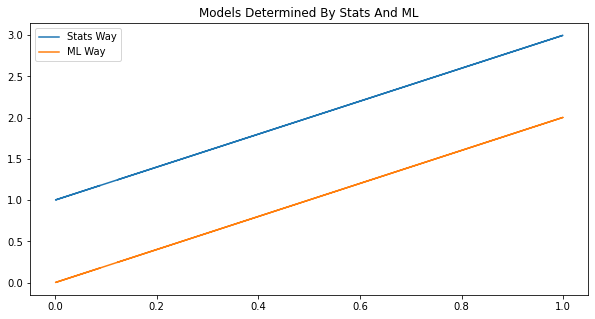

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Synthesize some data (i.e. create fake data)
X = np.random.uniform(0, 1, 1000)
Y = 2.0 * X
Y_noise = np.max(Y) * 0.073
Y += np.random.normal(0, 0.073, 1000)

# Statistics Way To Create Model
X_std = np.std(X)
Y_std = np.std(Y)
r = np.corrcoef(X, Y)
print(r)
print()
Cs = Y_std / X_std * r[0, 1]
print(Cs)

# Machine Learning
mod_LR = LinearRegression(fit_intercept=False, copy_X=True)
mod_LR.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
Cml = mod_LR.coef_[0, 0]
print(Cml)

# Visualize
plt.figure(figsize=(10, 5))
plt.plot(X, Cs*X+1) # + 1 separates the two exact plots
plt.plot(X, Cml*X)
plt.title('Models Determined By Stats And ML')
plt.legend(('Stats Way', 'ML Way'))
plt.show()

# Regressor Coefficient AND "Intercept"<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FROM Statistics

1.9992493711567196
1.001206029449972


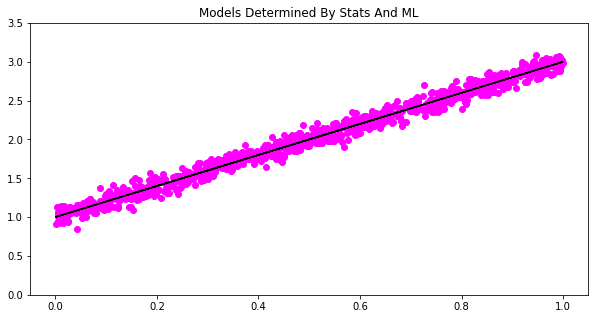

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Synthesize some data (i.e. create fake data)
X = np.random.uniform(0, 1, 1000)
Y = 2.0 * X + 1
Y_noise = np.max(Y) * 0.073
Y += np.random.normal(0, 0.073, 1000)

# Statistics Way To Fit Model Coefficient
X_std = np.std(X)
Y_std = np.std(Y)
r = np.corrcoef(X, Y)
Cs = Y_std / X_std * r[0, 1]
print(Cs)

# Statistics Way To Calculate Intercept
X_mean = np.mean(X)
Y_mean = np.mean(Y)
b = Y_mean - Cs*X_mean
print(b)

In [ ]:
# Visualize
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color='magenta')
plt.plot(X, Cs*X+b, color='black')
plt.ylim((0, 3.5))
plt.title('Models Determined By Stats And ML')
plt.show()

# Central Limit Theorem Principles

## Sample Means Distribtion For Increasing Sample Sizes

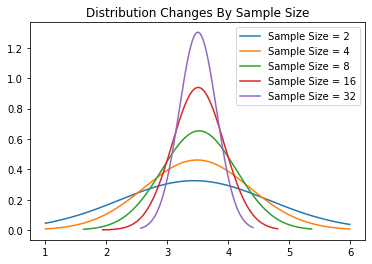

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

die_values = [1, 2, 3, 4, 5, 6]
sample_sizes = [2, 4, 8, 16, 32]

for experiment in range(1):
    for sample_size in sample_sizes:
        sample_means = []
        for num_samples in range(1000):
            die_cast = np.random.choice(
            die_values, size=sample_size)
            sample_mean = np.mean(die_cast)
            sample_means.append(sample_mean)

        experiment_mean = np.mean(sample_means)
        experiment_std = np.std(sample_means)
        x_min = min(sample_means)
        x_max = max(sample_means)
        x = np.arange(x_min, x_max, 0.01)
        y = norm.pdf(x, experiment_mean, experiment_std)
        plt.plot(x, y)

    legend_texts = [f'Sample Size = {v}' for v in sample_sizes]
    plt.legend(legend_texts)
    plt.title("Distribution Changes By Sample Size")
    plt.show()

## Approaching The Central Limit Theorem

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

cwd = os.getcwd()
if not os.path.isdir(f"{cwd}/images"):
    os.mkdir(f"{cwd}/images")

no_images = True
image_num = 0
if no_images:
    die_values = [1, 2, 3, 4, 5, 6]
    sample_sizes = [2, 4, 8, 16, 32]
    num_add_samples_list = [2] + [1]*8 + [2]*5 + [10]*8 + [100]*9
    sample_means_D = {k: [] for k in sample_sizes}
    total_samples = 0

    for num_samples in num_add_samples_list:
        total_samples += num_samples
        plt.figure(figsize=(12, 6))
        for sample_size in sample_sizes:
            for sample_num in range(num_samples):
                die_cast = np.random.choice(
                die_values, size=sample_size)
                sample_mean = np.mean(die_cast)
                sample_means_D[sample_size].append(sample_mean)

            experiment_mean = np.mean(sample_means_D[sample_size])
            experiment_std = np.std(sample_means_D[sample_size])
            x_min = min(sample_means_D[sample_size])
            x_max = max(sample_means_D[sample_size])
            x = np.arange(x_min, x_max, 0.001)
            y = norm.pdf(x, experiment_mean, experiment_std)
            plt.plot(x, y)

        legend_texts = [f'Sample Size = {v}' for v in sample_sizes]
        plt.legend(legend_texts)
        title = f"Distribution Of Means For {total_samples} "
        title += "Samples For Various Sample Sizes"
        plt.title(title)
        plt.xlim([1, 6])
        if total_samples == 2:
            for i in range(5):
                plt.savefig(f"{cwd}/images/{image_num:02d}.png")
                image_num += 1
        elif total_samples == 1000:
            for i in range(5):
                plt.savefig(f"{cwd}/images/{image_num:02d}.png")
                image_num += 1
        else:
            plt.savefig(f"{cwd}/images/{image_num:02d}.png")
            image_num += 1

        plt.close()

# Run below on command line in images subdirectory to create movie - needs ffmpeg
# ffmpeg -framerate 4 -pattern_type glob -i "*.png" output.avi


## Sample From Huge Population To See When Central Limit Theorem Is Reached

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

die_values = [1, 2, 3, 4, 5, 6]
die_roles = [np.random.choice(die_values, size=1)[0] for _ in range(int(1e6))]

# plt.hist(die_roles, bins=6, width=0.73)
# plt.show();

mean = round(np.mean(die_roles), 1)
print(f'Population mean is {mean}')

for sample_size in [2, 4, 8, 16, 32, 64]:
    sample_means = []
    samples = 0
    while True:
        samples += 1
        roles = np.random.choice(die_roles, size=sample_size)
        sample_mean = np.mean(roles)
        sample_means.append(sample_mean)

        running_mean = round(np.mean(sample_means), 2)
        if running_mean == 3.50:
            break

    title = f'Mean sample means = {running_mean} for {samples} samples of {sample_size}'
    running_std = np.std(sample_means)
    x = np.arange(1, 6, 0.001)
    y = norm.pdf(x, running_mean, running_std)
    plt.xlim([1, 6])
    plt.plot(x, y)
    plt.title(title)
    plt.axvline(3.5)
    plt.show();

## The Ugly Approach To The Central Limit Theorem

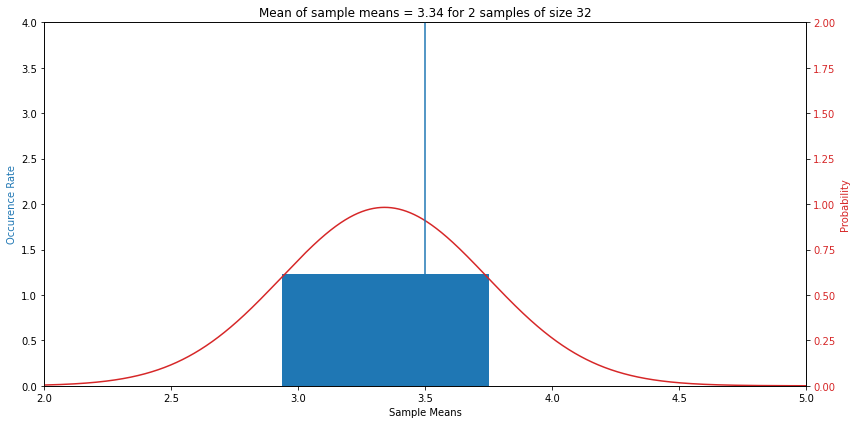

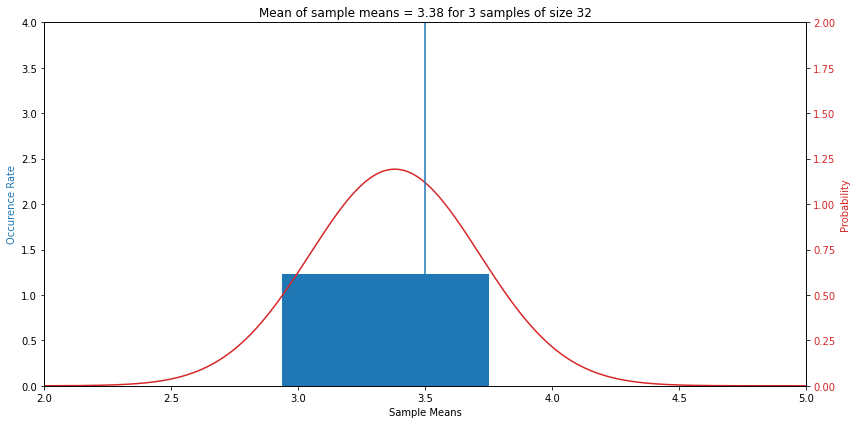

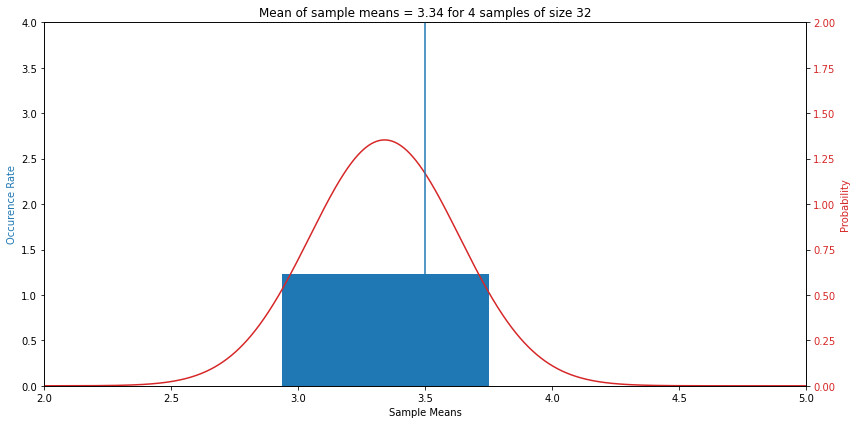

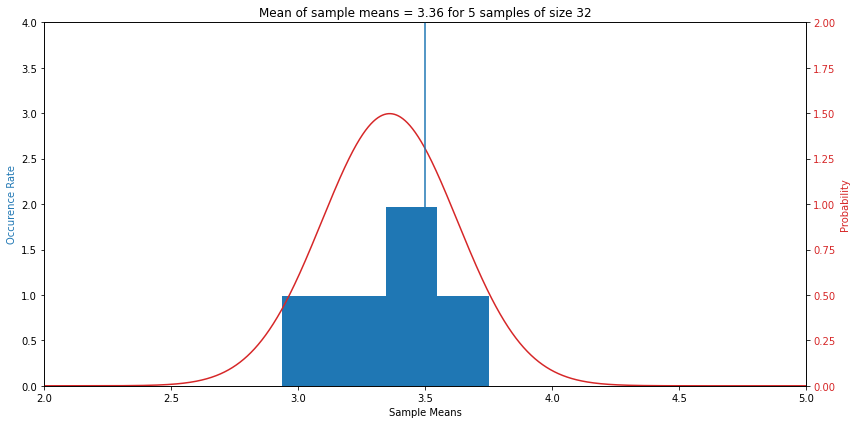

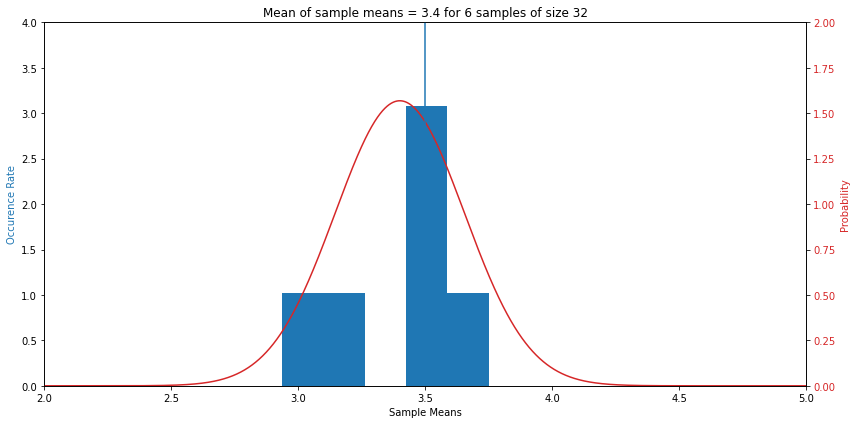

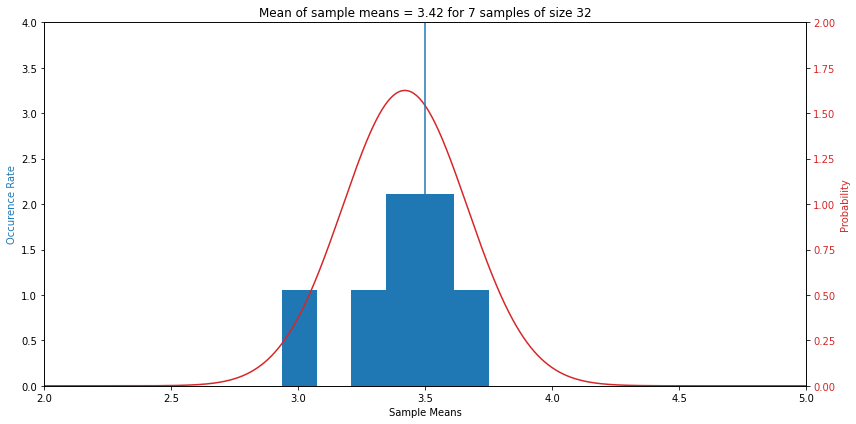

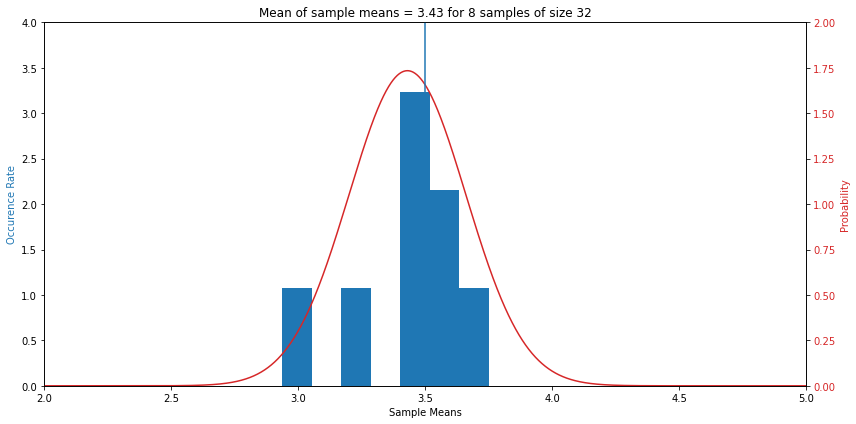

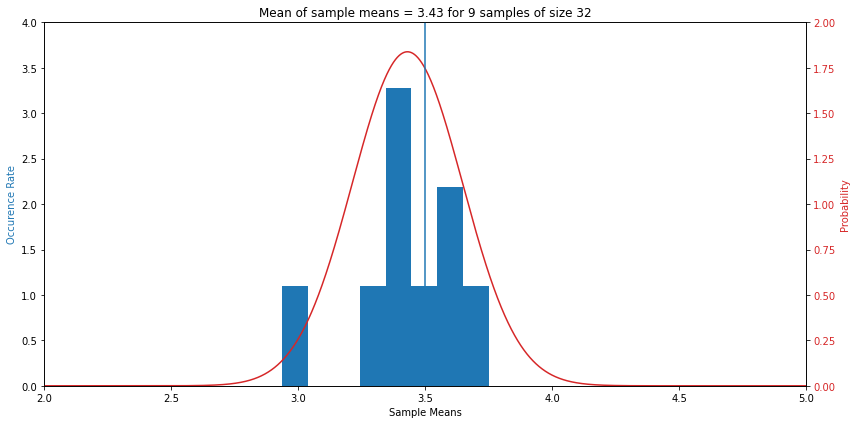

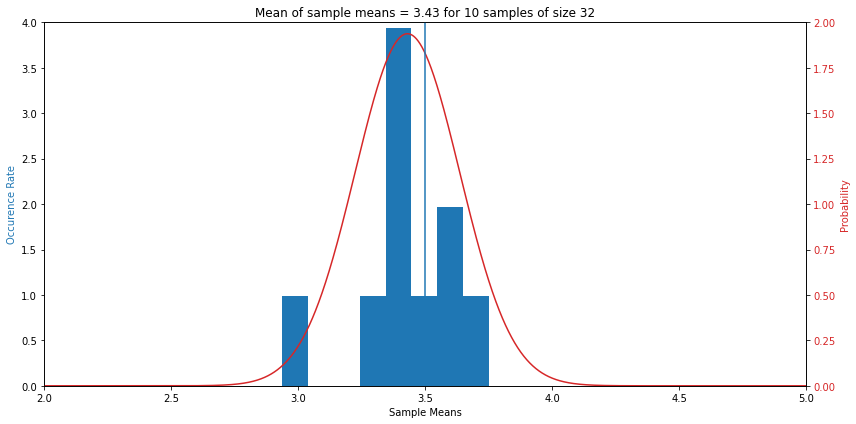

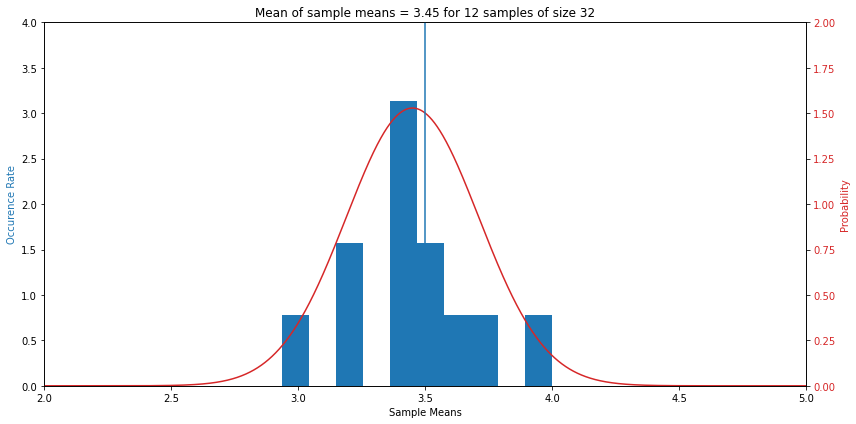

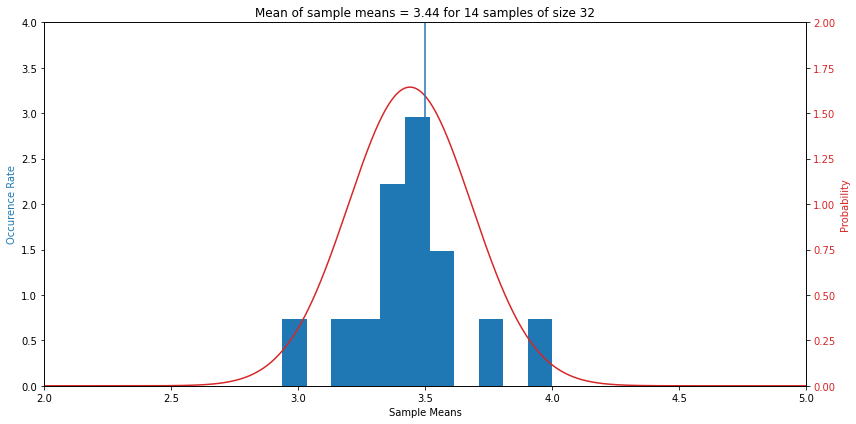

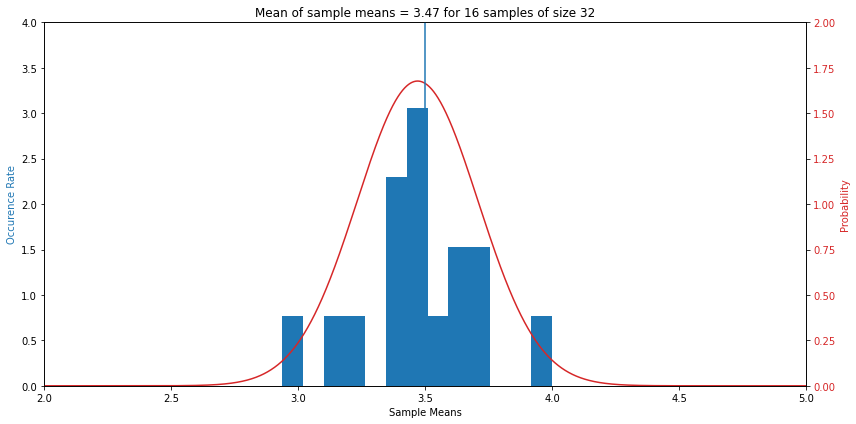

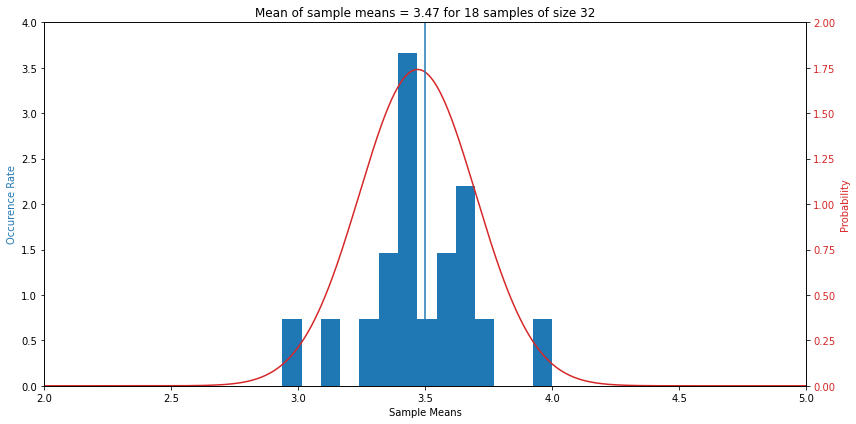

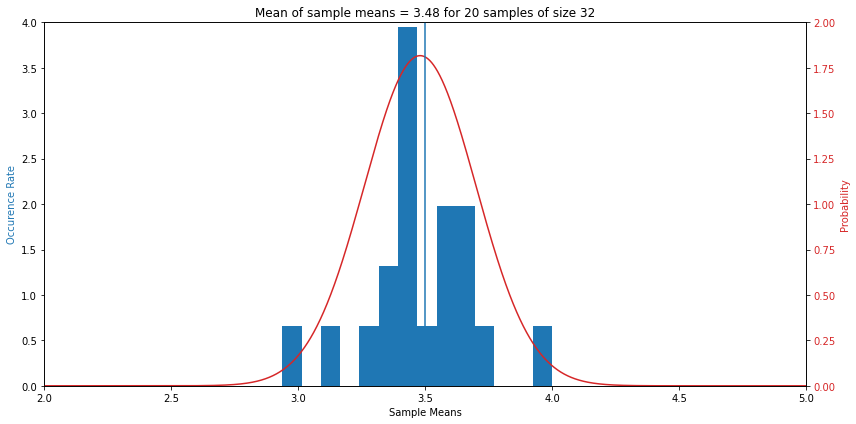

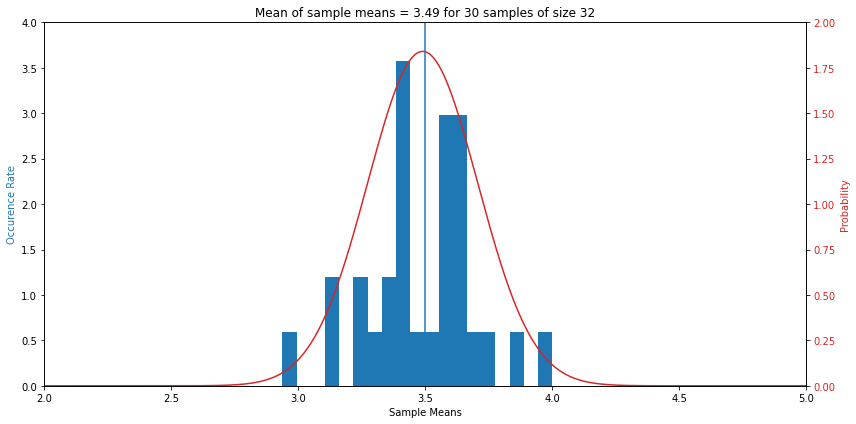

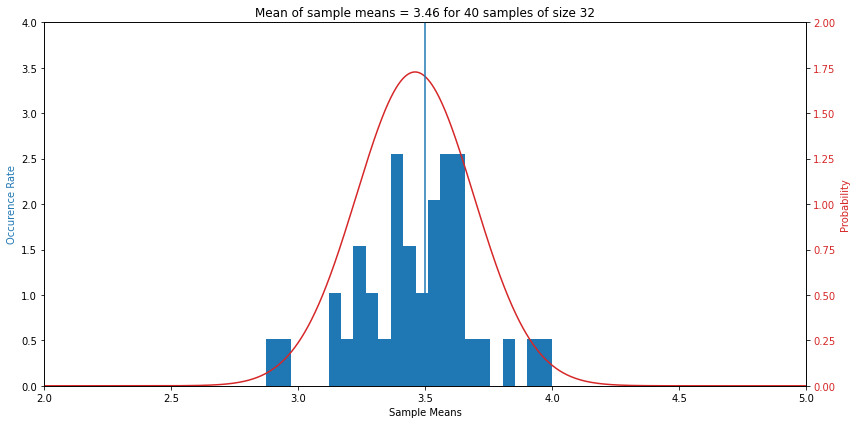

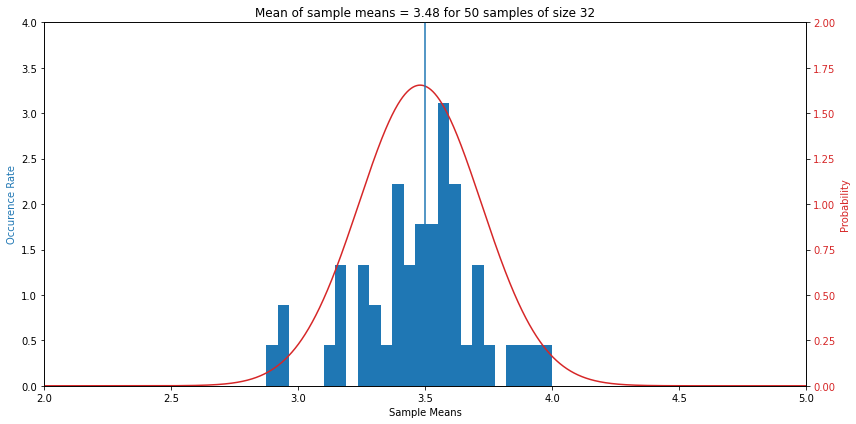

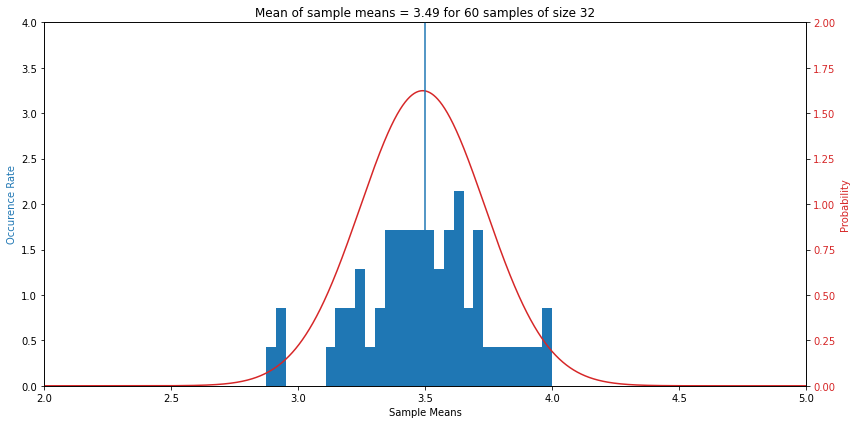

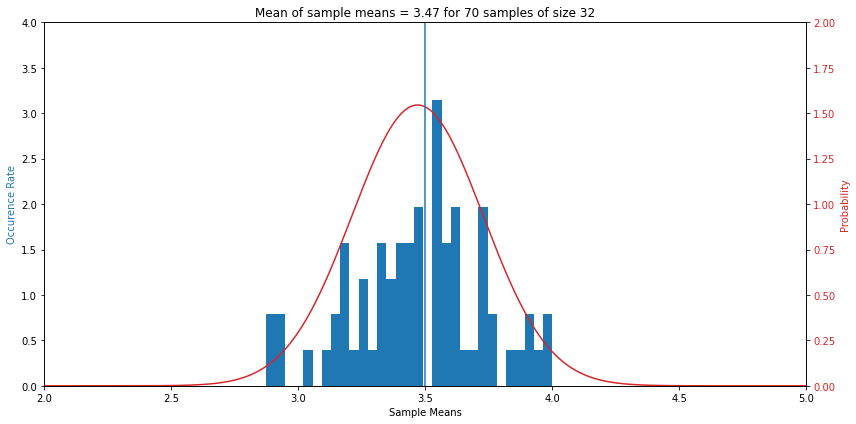

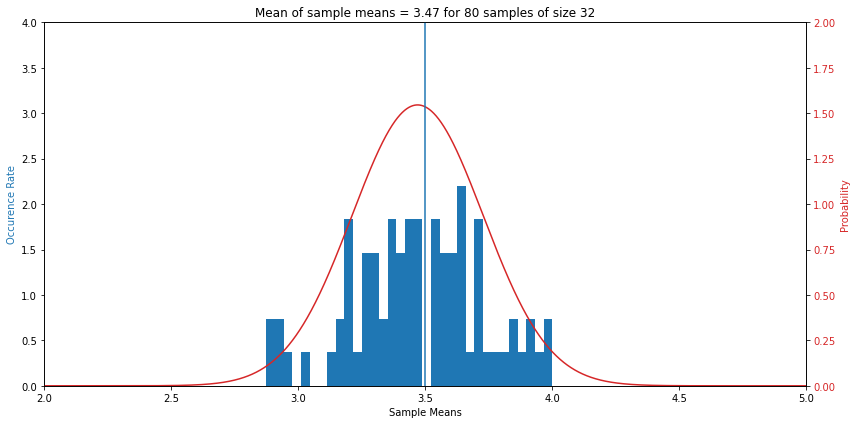

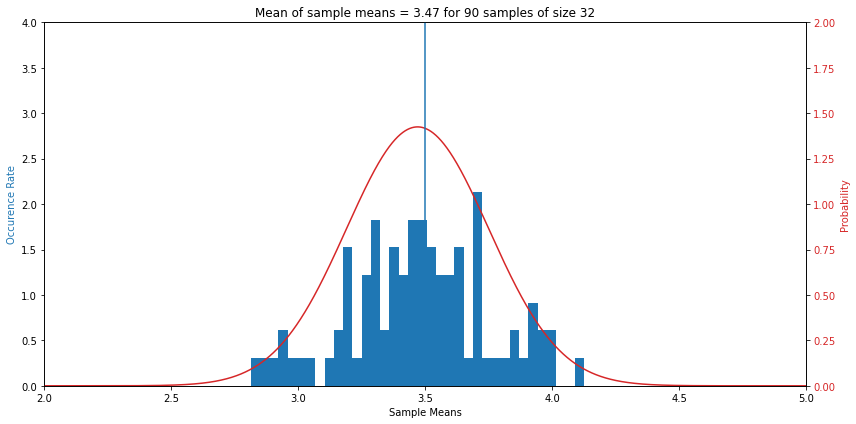

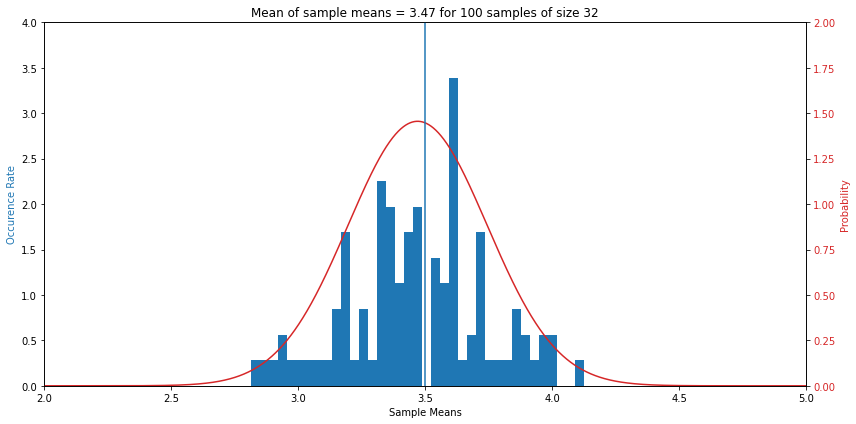

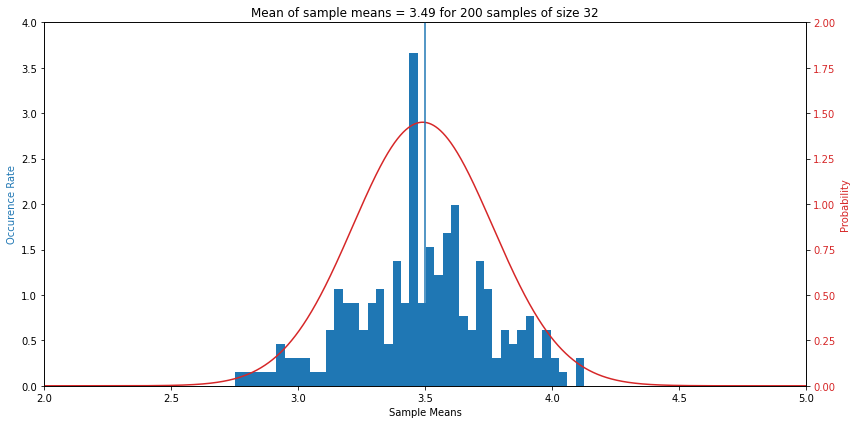

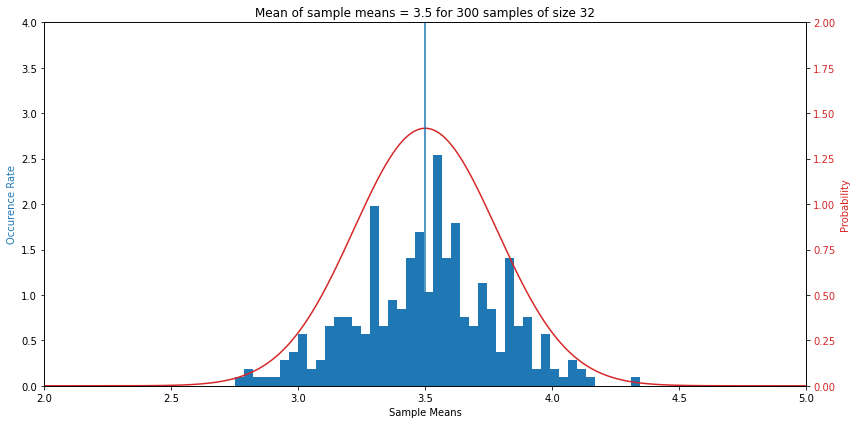

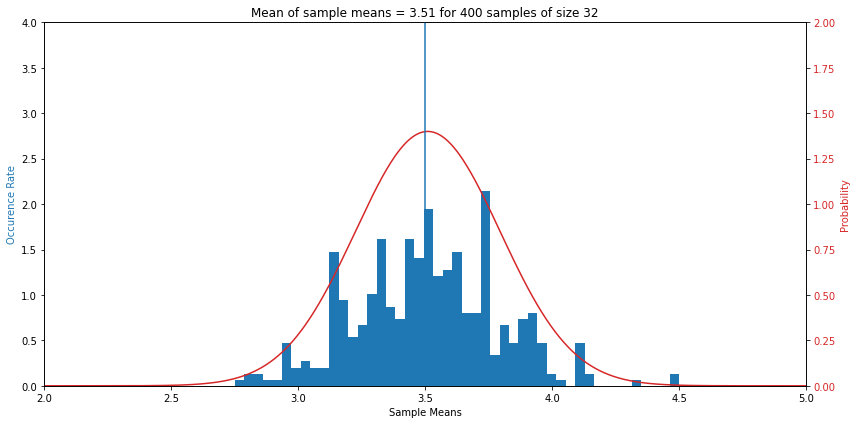

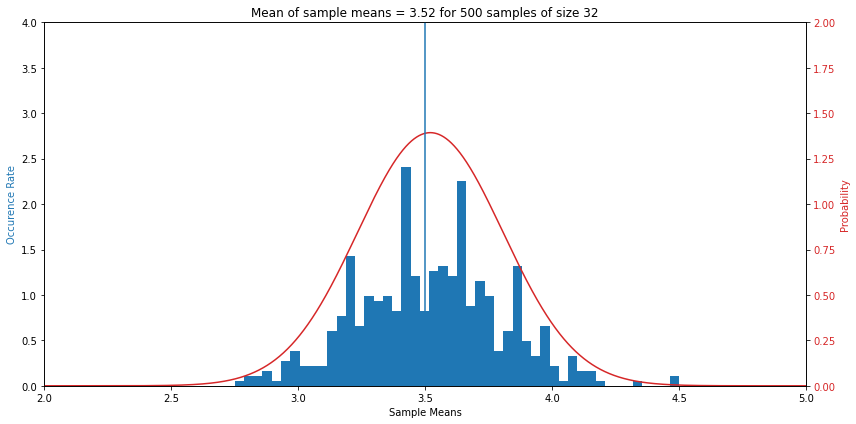

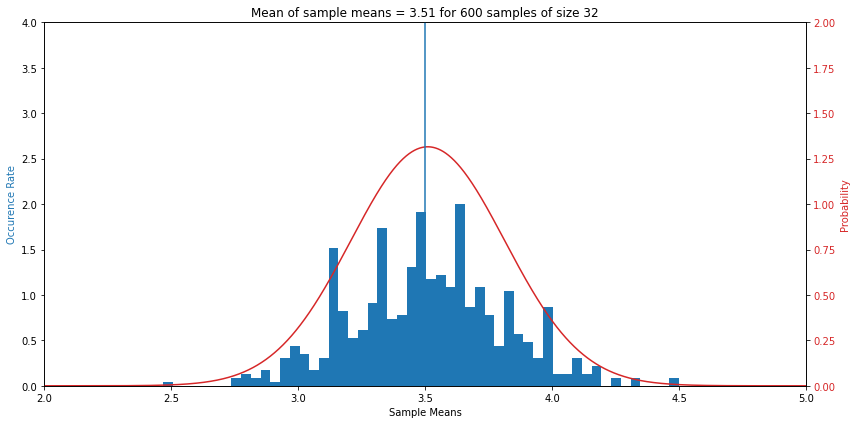

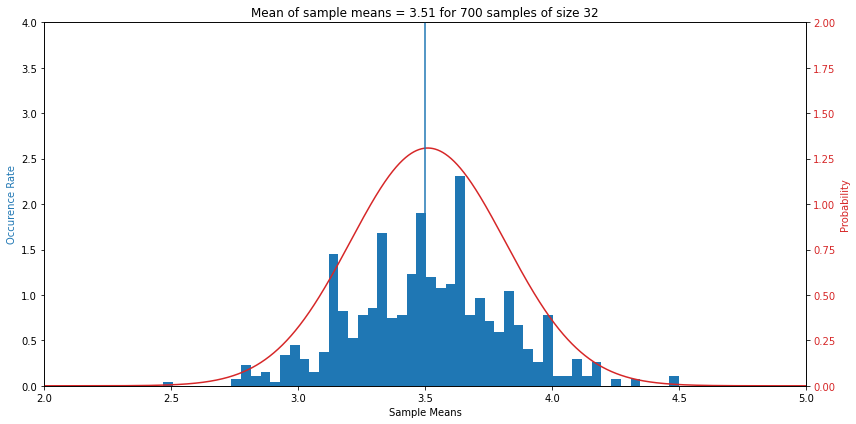

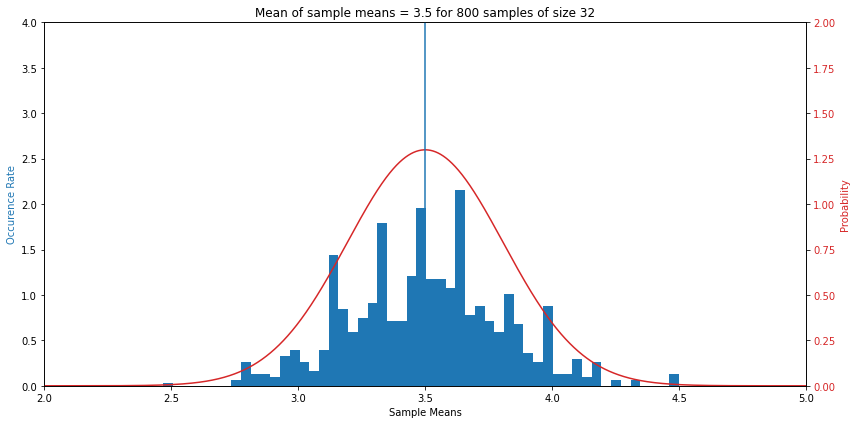

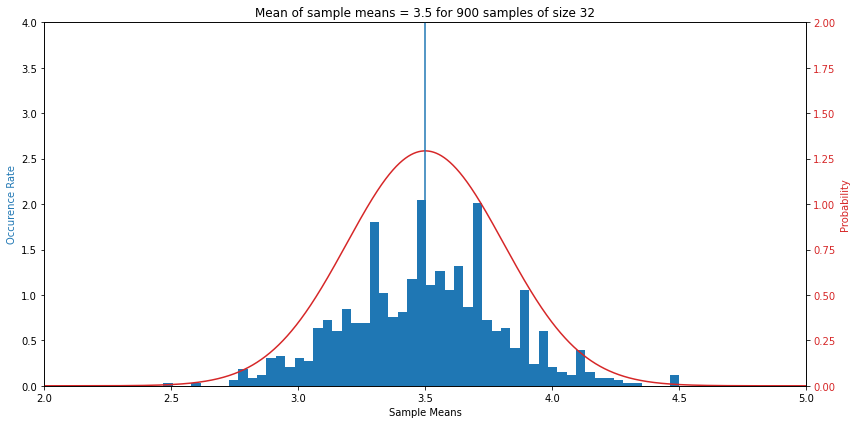

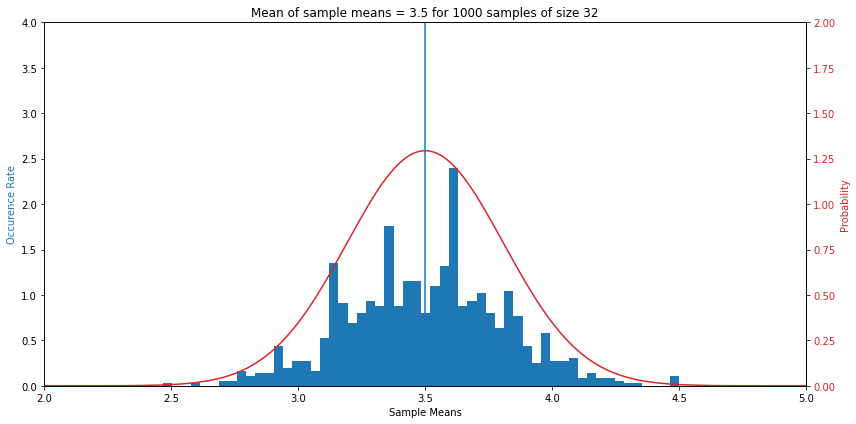

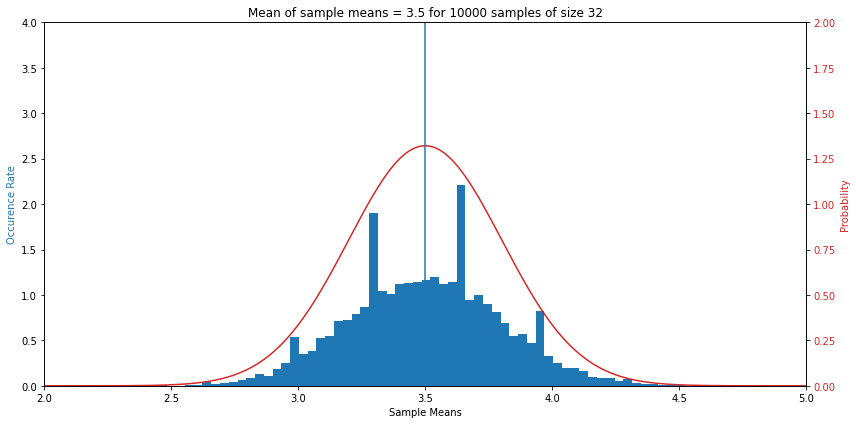

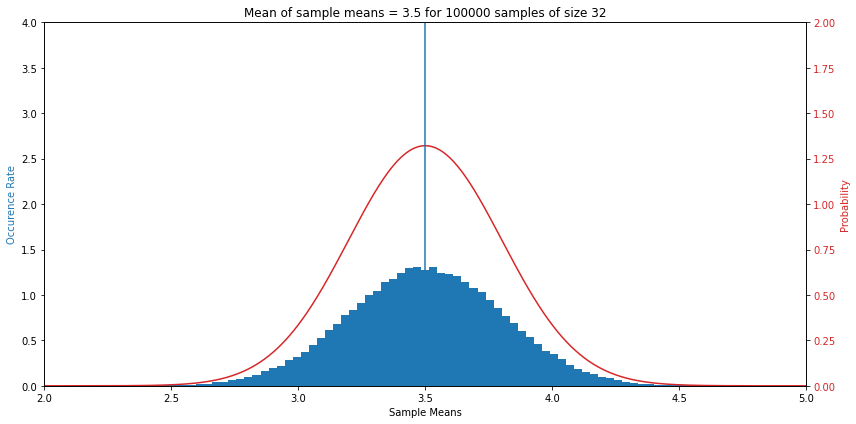

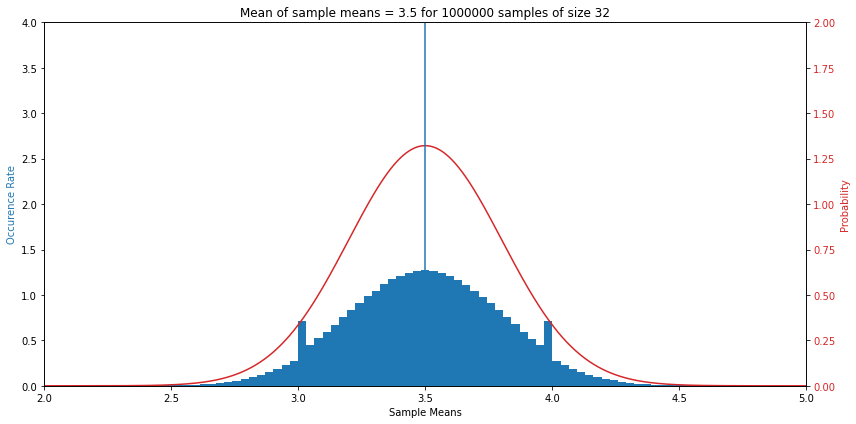

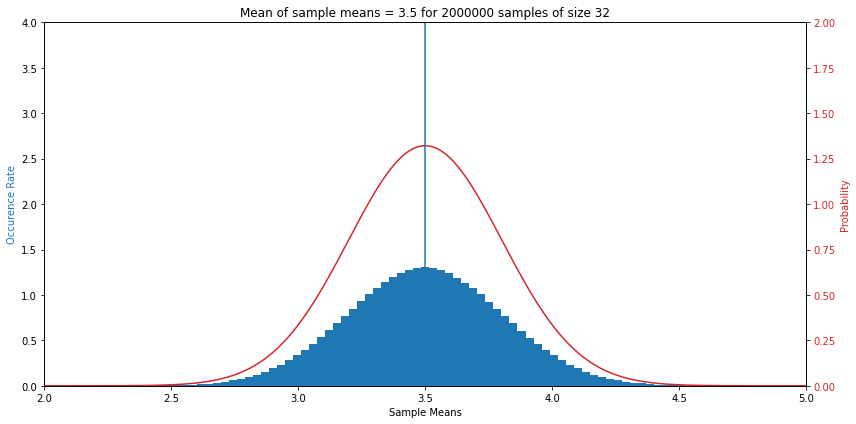

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

cwd = os.getcwd()
if not os.path.isdir(f"{cwd}/images"):
    os.mkdir(f"{cwd}/images")

no_images = True
image_num = 0
if no_images:
    die_values = [1, 2, 3, 4, 5, 6]
    num_add_samples_list = [2] + [1]*8 + [2]*5 + [10]*8 + [100]*9
    num_add_samples_list += [9000] + [90000] + [900000] + [1000000]
    sample_means = []
    total_samples = 0

    for num_samples in num_add_samples_list:
        total_samples += num_samples
        for sample_num in range(num_samples):
            die_casts = np.random.choice(
                die_values, size=32)
            sample_mean = np.mean(die_casts)
            sample_means.append(sample_mean)

        fig, ax1 = plt.subplots()
        fig.set_figheight(6)
        fig.set_figwidth(12)

        color = 'tab:blue'
        ax1.set_xlabel('Sample Means')
        ax1.set_ylabel('Occurence Rate', color=color)
        bins = len(set(sample_means))
        ax1.hist(sample_means, bins=bins, density=True, stacked=True)
        ax1.set_xlim([2, 5])
        ax1.set_ylim([0, 4])

        ax2 = ax1.twinx()

        color = 'tab:red'
        ax2.set_ylabel('Probability', color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        running_mean = round(np.mean(sample_means), 2)
        title = f'Mean of sample means = {running_mean} '
        title += f'for {total_samples} samples of size 32'
        running_std = np.std(sample_means)
        x = np.arange(2, 5, 0.001)
        y = norm.pdf(x, running_mean, running_std)
        ax2.plot(x, y, color=color)
        ax2.set_ylim([0, 2])

        plt.title(title)
        plt.axvline(3.5)

        fig.tight_layout()

        # if total_samples == 2:
        #     for i in range(5):
        #         plt.savefig(f"{cwd}/images/{image_num:02d}.png")
        #         image_num += 1
        # elif total_samples > 1000000:
        #     for i in range(5):
        #         plt.savefig(f"{cwd}/images/{image_num:02d}.png")
        #         image_num += 1
        # else:
        #     plt.savefig(f"{cwd}/images/{image_num:02d}.png")
        #     image_num += 1

        plt.show();

        # plt.close()

# Run below on command line to create movie - needs ffmpeg
# ffmpeg -framerate 4 -pattern_type glob -i "*.png" output.avi


## Two Y Axes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Binomial Variables

## Rules Binomial Variables
1. Comprised Of Independent Trials
1. Each Trial Can Be Regarded As A Success Or Failure
1. There Are A FIXED Number Of Trials
1. Probability Of Success On Each Trial Is Constant (i.e. Rule 1 Repeats)

***NOTE:*** Use The 10% Rule For Approximate Independence Of Trials When Resampling Is Not Possible

# Binomial Combinametrics

$$ p(k \; of \; n) = \left( \begin{matrix} n \\ k \end{matrix} \right) p^k (1-p)^{n-k} $$
<br>

$$ \binom {n}{k}=\frac {n!}{k!(n-k)!} $$
<br>

$$ \left(\!\!{n \choose k}\!\!\right)={n+k-1 \choose k}={\frac {(n+k-1)!}{k!\,(n-1)!}}={n(n+1)(n+2)\cdots (n+k-1) \over k!}, $$
<br>

$$ p(k \; of \; n) = \frac{n!}{k!(n-k)!} p^k (1-p)^{n-k} $$
<br>

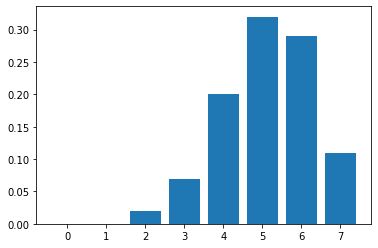

In [ ]:
# Independent Trials Success Probability = 0.73
import math
import matplotlib.pyplot as plt

fact = math.factorial

Ps = 0.73
p_D = {}
n = 7
for k in range(n+1):
    nCk = fact(n) / (fact(k) * fact(n-k))
    p = nCk * Ps**k * (1 - Ps)**(n - k)
    p_D[k] = round(p, 2)

plt.bar(p_D.keys(), p_D.values())
plt.show()